In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
df =pd.read_csv("master.csv")
pd.set_option('display.max_column',20)

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
df.columns =df.columns.str.rstrip()
df.columns =df.columns.str.lstrip()

In [5]:
df.columns = df.columns.str.replace('$','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.lower()

In [6]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country_year          object
hdi for year         float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [7]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country_year,hdi for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


<AxesSubplot:>

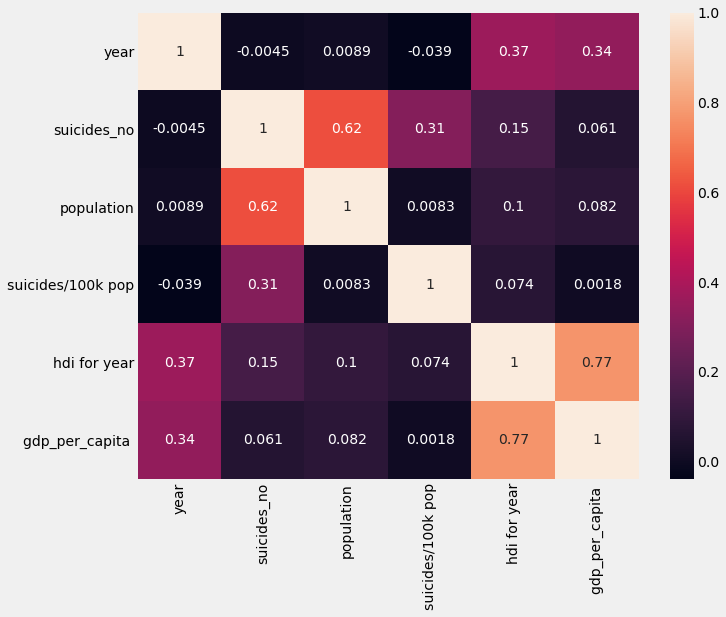

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## Data PreProcessing

#### Age Column

In [52]:
age_lables ={'5-14 years':1,'15-24 years':2,'25-34 years':3,'35-54 years':4,'55-74 years':5,'75+ years':6}

In [10]:
df['age']=df['age'].replace(age_lables)

In [11]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country_year,hdi for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,4,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,6,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,1,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,1,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### hdi for year column

In [12]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country_year             0
hdi for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [13]:
df[df['hdi for year'].isnull()]['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001,
       2002, 2003, 2004, 2006, 2007, 2008, 2009, 1985, 1986, 1990, 1991,
       1995, 2000, 2005, 2015, 2016, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [15]:
available_year =df[~df['hdi for year'].isnull()][['year','hdi for year']]
available_year

,year,hdi for year
72,1995,0.619
73,1995,0.619
74,1995,0.619
75,1995,0.619
76,1995,0.619
...,...,...
27815,2014,0.675
27816,2014,0.675
27817,2014,0.675
27818,2014,0.675


In [16]:
year_hdi = dict(available_year.groupby('year')['hdi for year'].mean())

In [17]:
year_hdi

{1985: 0.6991621621621594,
 1990: 0.7157999999999984,
 1995: 0.7364285714285718,
 2000: 0.7529605263157911,
 2005: 0.7794342105263165,
 2010: 0.7938690476190464,
 2011: 0.7957777777777749,
 2012: 0.8045256410256428,
 2013: 0.808311688311691,
 2014: 0.8085200000000008}

In [18]:
index=year_hdi.keys()
items =year_hdi.values()
index,items

(dict_keys([1985, 1990, 1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014]),
 dict_values([0.6991621621621594, 0.7157999999999984, 0.7364285714285718, 0.7529605263157911, 0.7794342105263165, 0.7938690476190464, 0.7957777777777749, 0.8045256410256428, 0.808311688311691, 0.8085200000000008]))

In [19]:
df2=df.copy()

In [20]:
for i in index:
        value=np.round(year_hdi.get(i),3)
        df2['hdi for year']= np.where(((df2['year']==i) & (df2['hdi for year'].isnull())),value,df2['hdi for year'])

In [21]:
df2.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country_year             0
hdi for year         18544
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

#### suicides/100k pop

In [22]:
df2.rename(columns={'suicides/100k pop':'sucide_rate'},inplace=True)
df2

,country,year,sex,age,suicides_no,population,sucide_rate,country_year,hdi for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,4,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,6,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,1,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,1,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [23]:
df3=df2.copy()

# Filling NAN Val

In [24]:
df3['hdi for year'] =df3['hdi for year'].fillna(method='bfill')

In [25]:
df3

,country,year,sex,age,suicides_no,population,sucide_rate,country_year,hdi for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,2,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,4,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,6,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,1,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,1,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [27]:
df3.isnull().sum()

country            0
year               0
sex                0
age                0
suicides_no        0
population         0
sucide_rate        0
country_year       0
hdi for year       0
gdp_for_year       0
gdp_per_capita     0
generation         0
dtype: int64

# DATA Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
country_encoder =LabelEncoder()
df3['country']=country_encoder.fit_transform(df3['country'])
df3

,country,year,sex,age,suicides_no,population,sucide_rate,country_year,hdi for year,gdp_for_year,gdp_per_capita,generation
0,0,1987,male,2,21,312900,6.71,Albania1987,0.619,"2,156,624,900",796,Generation X
1,0,1987,male,4,16,308000,5.19,Albania1987,0.619,"2,156,624,900",796,Silent
2,0,1987,female,2,14,289700,4.83,Albania1987,0.619,"2,156,624,900",796,Generation X
3,0,1987,male,6,1,21800,4.59,Albania1987,0.619,"2,156,624,900",796,G.I. Generation
4,0,1987,male,3,9,274300,3.28,Albania1987,0.619,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,female,4,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,100,2014,female,6,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,100,2014,male,1,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,100,2014,female,1,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [29]:
# As we have country and year both column so we drop this combine column
df3.drop('country_year',axis=1,inplace=True)

In [31]:
df3.columns = df3.columns.str.replace(' ','')

In [32]:
df3.rename(columns={'hdiforyear':'hdi_for_year'},inplace=True)

In [33]:
df3

,country,year,sex,age,suicides_no,population,sucide_rate,hdi_for_year,gdp_for_year,gdp_per_capita,generation
0,0,1987,male,2,21,312900,6.71,0.619,"2,156,624,900",796,Generation X
1,0,1987,male,4,16,308000,5.19,0.619,"2,156,624,900",796,Silent
2,0,1987,female,2,14,289700,4.83,0.619,"2,156,624,900",796,Generation X
3,0,1987,male,6,1,21800,4.59,0.619,"2,156,624,900",796,G.I. Generation
4,0,1987,male,3,9,274300,3.28,0.619,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,female,4,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,100,2014,female,6,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,100,2014,male,1,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,100,2014,female,1,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [34]:
df3.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [35]:
pd.set_option('display.max_column',25)

In [36]:
df3=pd.get_dummies(data=df3,columns=['sex','generation'],drop_first=True)

In [37]:
df3

,country,year,age,suicides_no,population,sucide_rate,hdi_for_year,gdp_for_year,gdp_per_capita,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0,1987,2,21,312900,6.71,0.619,"2,156,624,900",796,1,0,1,0,0,0
1,0,1987,4,16,308000,5.19,0.619,"2,156,624,900",796,1,0,0,0,0,1
2,0,1987,2,14,289700,4.83,0.619,"2,156,624,900",796,0,0,1,0,0,0
3,0,1987,6,1,21800,4.59,0.619,"2,156,624,900",796,1,1,0,0,0,0
4,0,1987,3,9,274300,3.28,0.619,"2,156,624,900",796,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,4,107,3620833,2.96,0.675,"63,067,077,179",2309,0,0,1,0,0,0
27816,100,2014,6,9,348465,2.58,0.675,"63,067,077,179",2309,0,0,0,0,0,1
27817,100,2014,1,60,2762158,2.17,0.675,"63,067,077,179",2309,1,0,0,1,0,0
27818,100,2014,1,44,2631600,1.67,0.675,"63,067,077,179",2309,0,0,0,1,0,0


In [38]:
df3['gdp_for_year']=df3['gdp_for_year'].str.replace(',','')

In [39]:
df3['gdp_for_year']=df3['gdp_for_year'].astype('float')

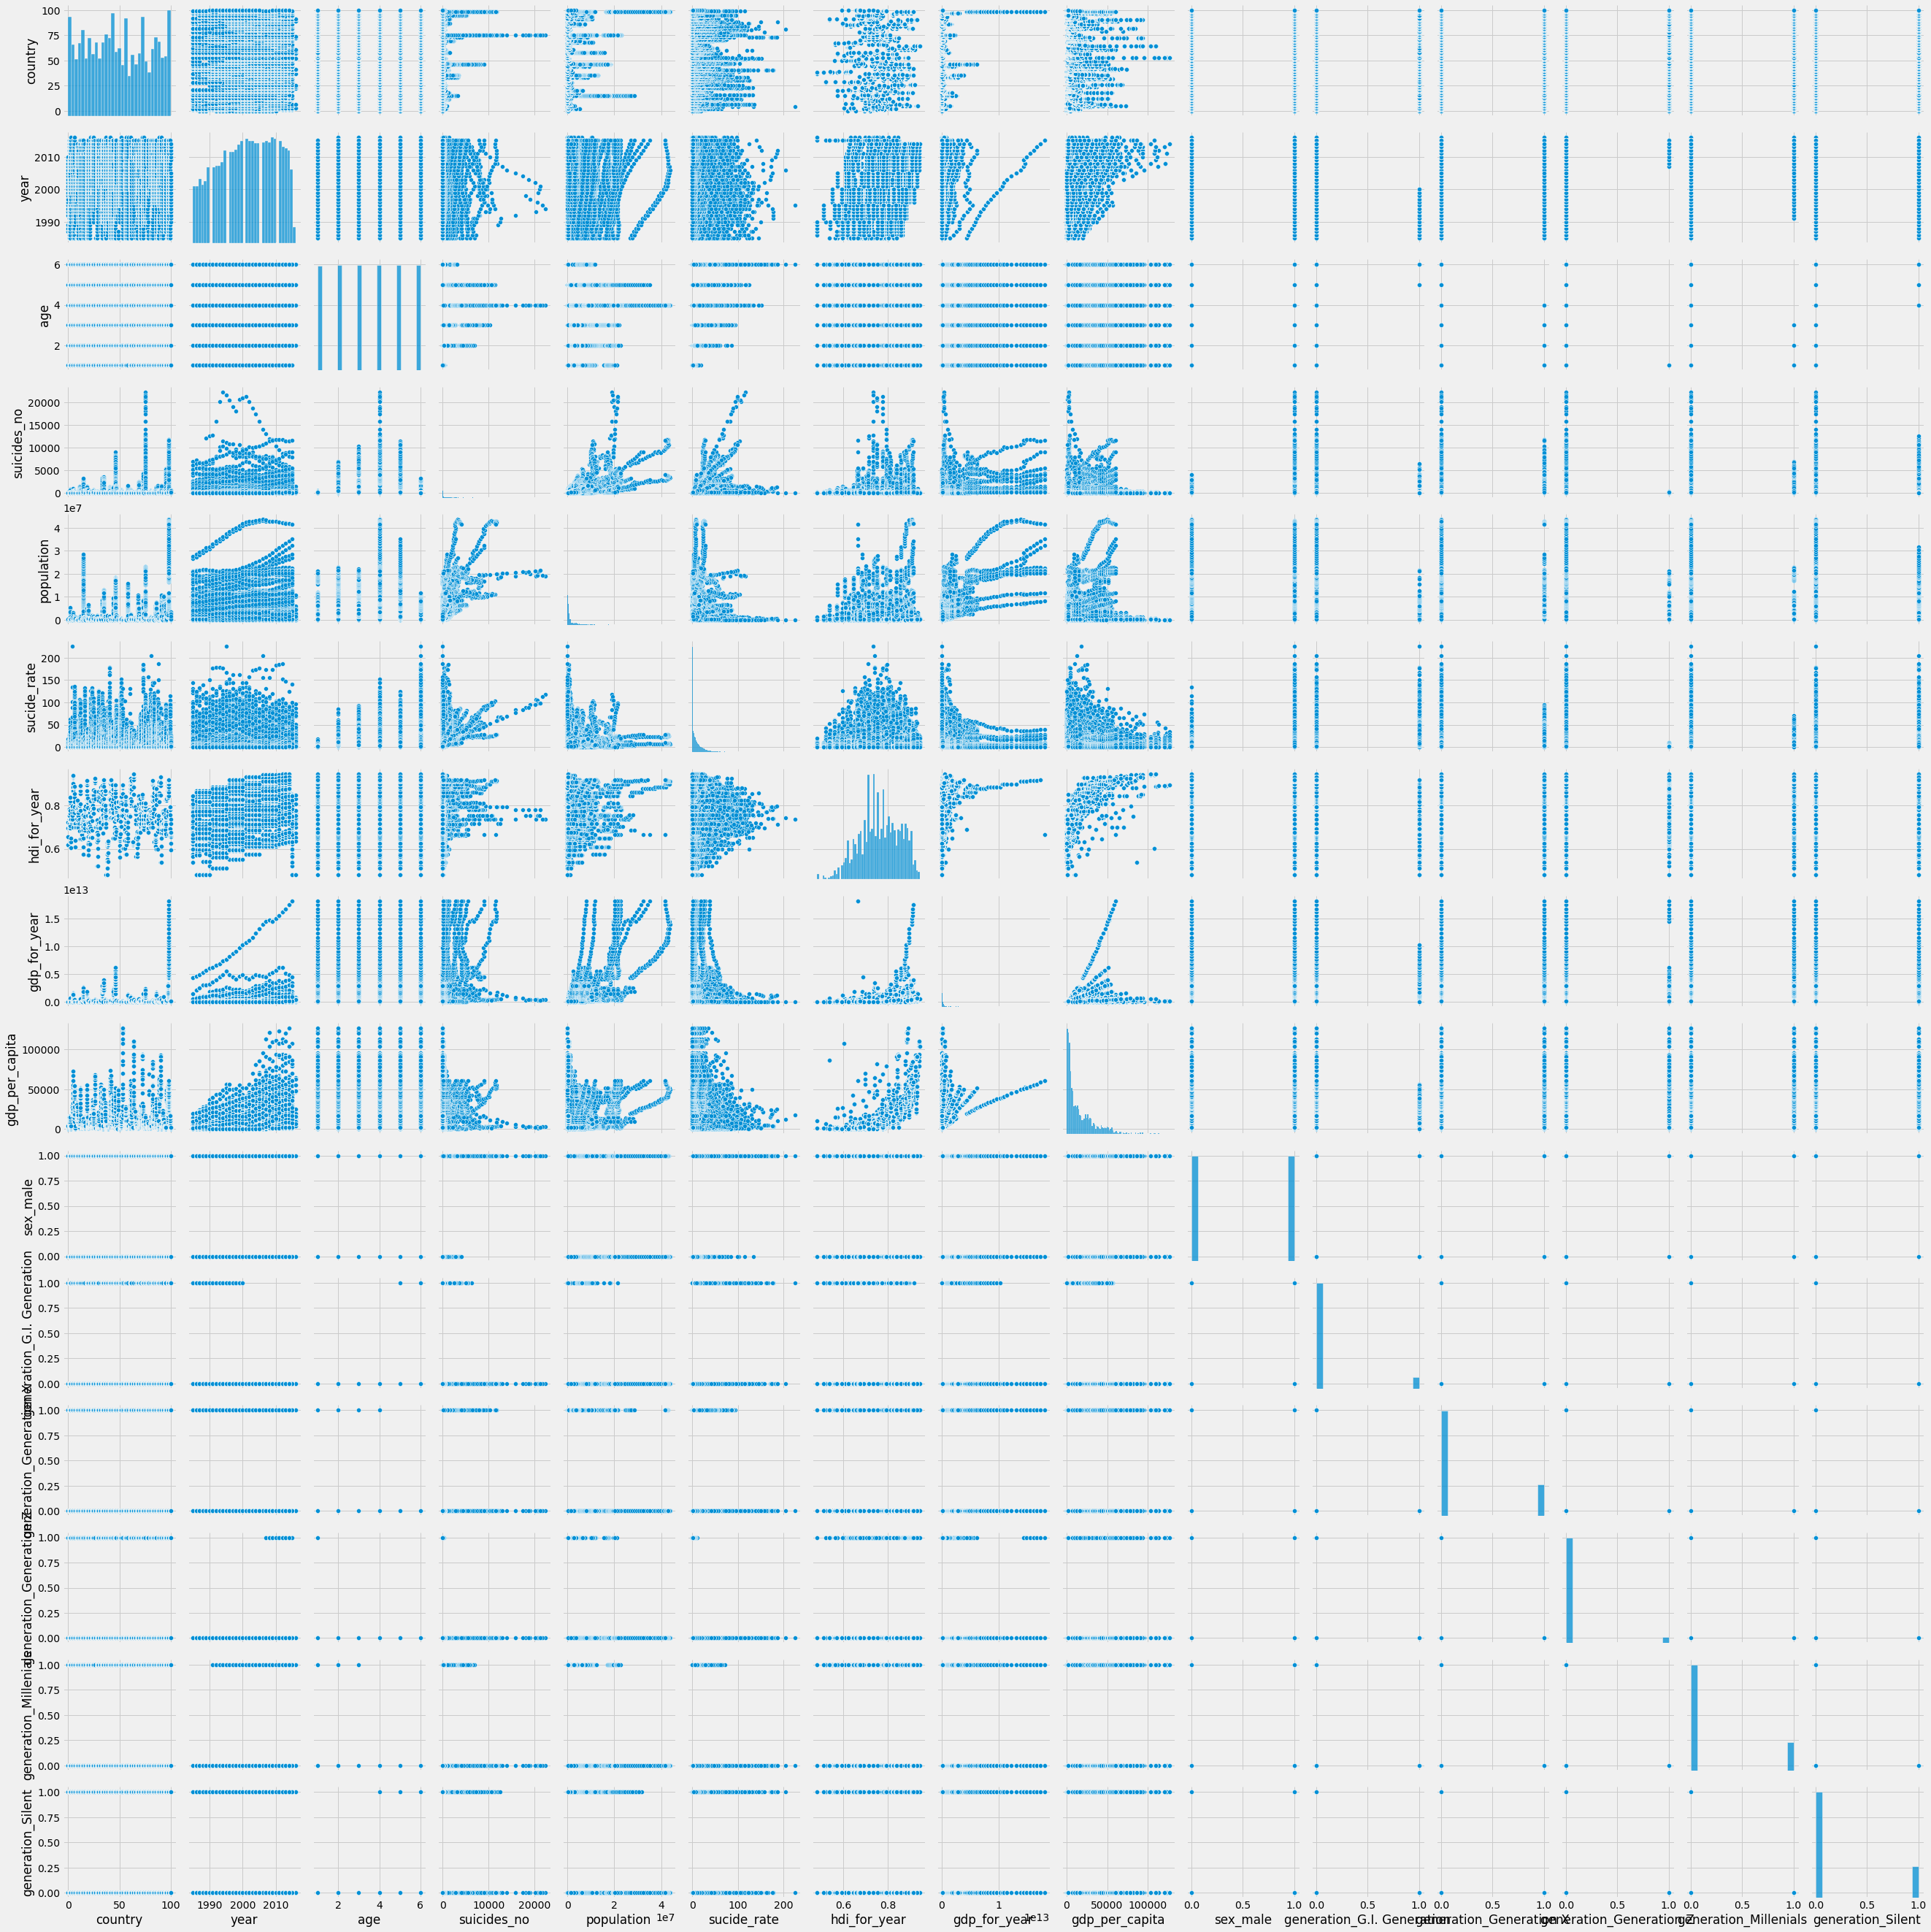

In [40]:
sns.pairplot(df3)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df3),columns=df3.columns)

In [42]:
scaled_data

,country,year,age,suicides_no,population,sucide_rate,hdi_for_year,gdp_for_year,gdp_per_capita,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.0,0.064516,0.2,0.000940,0.007137,0.029826,0.295011,0.000116,0.004322,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.064516,0.6,0.000716,0.007025,0.023070,0.295011,0.000116,0.004322,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.064516,0.2,0.000627,0.006607,0.021470,0.295011,0.000116,0.004322,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.064516,1.0,0.000045,0.000491,0.020403,0.295011,0.000116,0.004322,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.064516,0.4,0.000403,0.006256,0.014580,0.295011,0.000116,0.004322,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,1.0,0.935484,0.6,0.004790,0.082652,0.013157,0.416486,0.003478,0.016320,0.0,0.0,1.0,0.0,0.0,0.0
27816,1.0,0.935484,1.0,0.000403,0.007949,0.011468,0.416486,0.003478,0.016320,0.0,0.0,0.0,0.0,0.0,1.0
27817,1.0,0.935484,0.0,0.002686,0.063050,0.009646,0.416486,0.003478,0.016320,1.0,0.0,0.0,1.0,0.0,0.0
27818,1.0,0.935484,0.0,0.001970,0.060069,0.007423,0.416486,0.003478,0.016320,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
X=scaled_data.drop('sucide_rate',axis=1)
y=scaled_data['sucide_rate']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression
logestic_model = LinearRegression()
logestic_model.fit(X_train,y_train)
y_pred = logestic_model.predict(X_test)
logestic_model.score(X_test,y_test)

0.36889221900069

In [45]:
# As we can see data work well in boosting techinque
from sklearn.ensemble import RandomForestRegressor
random_regressor_model = RandomForestRegressor()
random_regressor_model.fit(X_train,y_train)
y_pred = random_regressor_model.predict(X_test)
print("score",random_regressor_model.score(X_test,y_test))


from sklearn.metrics import mean_squared_error
print('mse',mean_squared_error(y_test,y_pred))

from sklearn.metrics import mean_absolute_error
print('mean_abs',mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986

score 0.9939044747514417
mse 4.117608826818187e-05
mean_abs 0.0014431223627963884


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9939044747514417

In [47]:
import math
print('rmse',math.sqrt(mean_squared_error(y_test, y_pred)))

rmse 0.0064168596889897685


In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
tree_model.score(X_test,y_test)

0.9776339309783606

In [49]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)
xgboost.score(X_test,y_test)

0.9937416974036531

In [221]:
from sklearn.ensemble import BaggingRegressor
bagging_regressor = BaggingRegressor()
bagging_regressor.fit(X_train,y_train)
y_pred = bagging_regressor.predict(X_test)
bagging_regressor.score(X_test,y_test)

0.9940917181848119

In [50]:
df3

,country,year,age,suicides_no,population,sucide_rate,hdi_for_year,gdp_for_year,gdp_per_capita,sex_male,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0,1987,2,21,312900,6.71,0.619,2.156625e+09,796,1,0,1,0,0,0
1,0,1987,4,16,308000,5.19,0.619,2.156625e+09,796,1,0,0,0,0,1
2,0,1987,2,14,289700,4.83,0.619,2.156625e+09,796,0,0,1,0,0,0
3,0,1987,6,1,21800,4.59,0.619,2.156625e+09,796,1,1,0,0,0,0
4,0,1987,3,9,274300,3.28,0.619,2.156625e+09,796,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,4,107,3620833,2.96,0.675,6.306708e+10,2309,0,0,1,0,0,0
27816,100,2014,6,9,348465,2.58,0.675,6.306708e+10,2309,0,0,0,0,0,1
27817,100,2014,1,60,2762158,2.17,0.675,6.306708e+10,2309,1,0,0,1,0,0
27818,100,2014,1,44,2631600,1.67,0.675,6.306708e+10,2309,0,0,0,1,0,0


In [51]:
df3.to_csv('cleaned_sucide_model.csv',index=False)